# 🎵 Spotify İçerik Tabanlı Müzik Öneri Sistemi

Bu notebook, Spotify şarkılarına ait bazı müziksel özellikleri kullanarak benzer şarkılar önermeyi amaçlayan **içerik tabanlı bir öneri sistemi** oluşturur.

## 🔍 Ne Yapıyor?

- Kullanıcının seçtiği bir veya birden fazla şarkıya göre öneri yapar
- Şarkıların benzerliğini **cosine similarity** ile hesaplar
- Makine öğrenmesi eğitimi gerekmez, tamamen veri analizi temellidir

## ⚙️ Kullanılan Özellikler

- `danceability`: Şarkının dans edilebilirliği  
- `energy`: Enerji seviyesi  
- `valence`: Duygusal pozitiflik (neşeli / hüzünlü)  
- `tempo`: BPM (Beats per Minute)

## 📌 Notlar

- 586.000’den fazla şarkı içeren büyük veri seti kullanıldı  
- Bellek sınırlarını aşmamak için ilk etapta 5000 şarkı ile test yapıldı  
- Gerçek zamanlı öneri için ayrı bir arayüz geliştirildi (`main.py` – Streamlit)

## 📊 Notebook İçeriği

- Verinin okunması ve işlenmesi  
- Özelliklerin normalizasyonu  
- Şarkılar arası benzerlik hesaplama  
- Örnek öneriler ve görselleştirmeler


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [67]:
# Veri setini yükle
df = pd.read_csv("../data/tracks.csv", encoding="utf-8-sig")

# İlk 5 satıra bakalım
df[features + ['name', 'artists']].head()

,danceability,energy,valence,tempo,name,artists
0,0.645,0.4450,0.127,104.851,Carve,['Uli']
1,0.695,0.2630,0.655,102.009,Capítulo 2.16 - Banquero Anarquista,['Fernando Pessoa']
2,0.434,0.1770,0.457,130.418,Vivo para Quererte - Remasterizado,['Ignacio Corsini']
3,0.321,0.0946,0.397,169.980,El Prisionero - Remasterizado,['Ignacio Corsini']
4,0.402,0.1580,0.196,103.220,Lady of the Evening,['Dick Haymes']


In [69]:
# Kullanacağımız ses özellikleri
features = ['danceability', 'energy', 'valence', 'tempo']

In [141]:
# Eksik verileri temizle
df_clean = df.dropna(subset=features).reset_index(drop=True)

# 50000 örnek alıyoruz
df_sampled = df_clean.sample(n=5000, random_state=42).reset_index(drop=True)

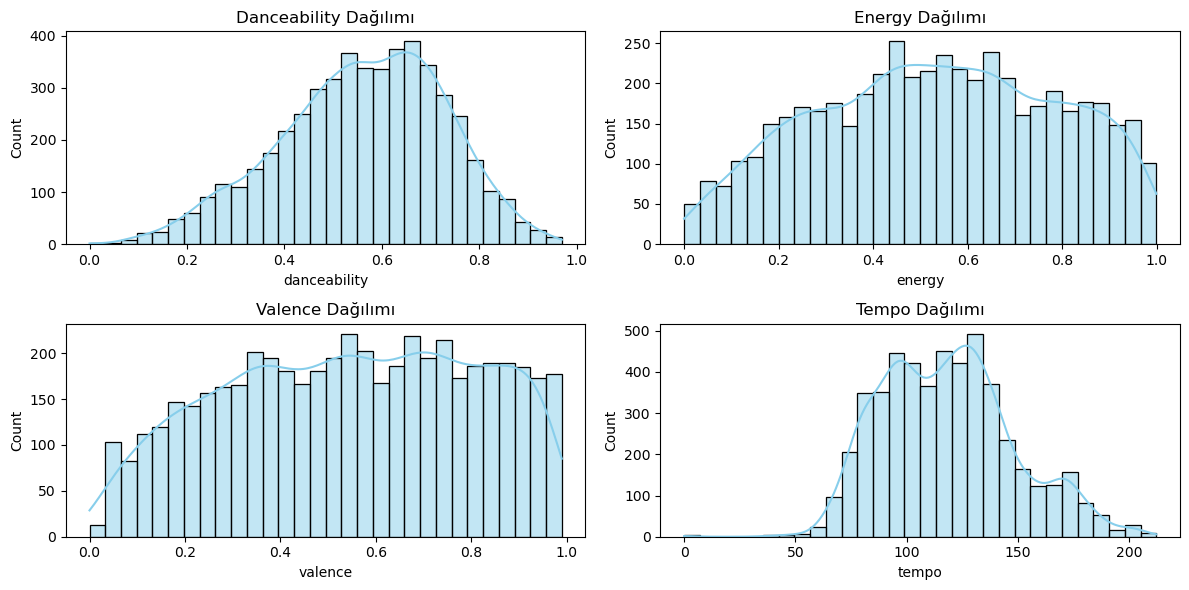

In [143]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_sampled[feature], kde=True, bins=30, color='skyblue')
    plt.title(f"{feature.capitalize()} Dağılımı")
plt.tight_layout()
plt.show()

In [145]:
# Özellik matrisini ayır
X = df_sampled[features]

# Normalize et
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [147]:
# Cosine similarity hesapla
similarity_matrix = cosine_similarity(X_scaled)

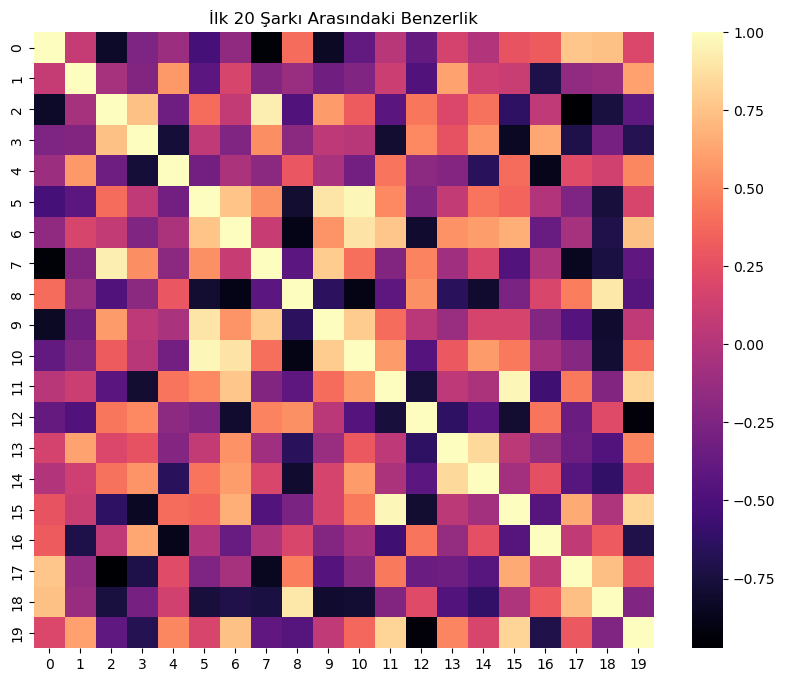

In [149]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix[:20, :20], cmap="magma")
plt.title("İlk 20 Şarkı Arasındaki Benzerlik")
plt.show()

In [151]:
# 1. şarkıyı alalım
song_index = 1
print("🎧 Seçilen Şarkı:", df_sampled.iloc[song_index]['name'])

# En benzer 5 şarkı
similar_indices = similarity_matrix[song_index].argsort()[::-1][1:6]
recommended = df_sampled.iloc[similar_indices][['name', 'artists']]

print("\n🎵 Önerilen Şarkılar:")
recommended

🎧 Seçilen Şarkı: 95

🎵 Önerilen Şarkılar:


,name,artists
2803,ไม่เจ็บอย่างฉันใครจะเข้าใจ - เพลงประกอบละคร สา...,['Fymme Bongkot']
1871,祇想一生跟你走,['Jacky Cheung']
4677,031 - Die Entführung in der Mondscheingasse - ...,['TKKG Retro-Archiv']
716,Peta Ta,['Light']
1507,Dead Body Man III,['Ouija Macc']


In [153]:
#Tüm veriyi kullan, normalize et
df_to_search = df_clean  # Örnekleme yok, tüm veri
X = df_to_search[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [155]:
# Kullanıcının beğendiği şarkıları yazıyoruz (df_sampled içinden)
liked_songs = [
    "Shape of You",
    "Bohemian Rhapsody",
    "Lose Yourself"
]

In [157]:
liked_indices = []

for song in liked_songs:
    matches = df_to_search[df_to_search['name'].str.contains(song, case=False, na=False)]
    if not matches.empty:
        idx = matches.index[0]
        liked_indices.append(idx)
        print(f"✅ '{song}' bulundu → index: {idx}")
    else:
        print(f"❌ '{song}' bulunamadı!")

✅ 'Shape of You' bulundu → index: 74874
✅ 'Bohemian Rhapsody' bulundu → index: 48488
✅ 'Lose Yourself' bulundu → index: 78375


In [159]:

if liked_indices:
    user_profile = X_scaled[liked_indices].mean(axis=0).reshape(1, -1)
    similarities = cosine_similarity(user_profile, X_scaled).flatten()

    top_indices = similarities.argsort()[::-1]
    top_indices = [i for i in top_indices if i not in liked_indices][:10]

    recommended = df_to_search.iloc[top_indices][['name', 'artists']]
    
    print("\n🎯 Önerilen Şarkılar:")
    display(recommended)
else:
    print("⚠️ Hiçbir şarkı eşleşmedi, öneri yapılamadı.")


🎯 Önerilen Şarkılar:


,name,artists
154631,Por Ti Podría Morir,['Luis Fonsi']
279844,劫後餘生,['Pakho Chau']
573753,I Cry,['Westlife']
80626,Roadkill [ASOT 332] - EDX’s Acapulco At Night ...,"['Dubfire', 'EDX']"
413373,不顧一切的愛,['Sam Lee']
333598,ผิดสัญญา,['Instinct']
113412,Many Ways - Radio Edit,"['Ferry Corsten', 'Jenny Wahlström']"
413538,看清,['輕鬆玩樂團']
380293,Virtual Zone,['Virtual Zone']
91839,A Thousand Seas,"['MaRLo', 'Roxanne Emery']"
